# 데이터 전처리 순서
: 데이터 셋 확인 -> 결측값 처리 -> 이상값 처리 -> Feature Engineering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# 중고 자동차 데이터 셋 불러오기
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

# 단계 1 - 데이터 셋 확인
* __변수 확인, raw data 확인__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### 결측치가 있는지만 확인하고 싶을 때

In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### 일부 column들만 확인하고 싶을 때

In [6]:
pd.set_option('display.max_columns',20)
display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### 각 칼럼이 의미하는 바를 파악하는 것이 데이터 전처리의 시작이다

In [9]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

#### ?를 결측치로 바꾸기

In [11]:
df.replace('?' ,np.nan, inplace = True)
display(df.head())
display(df.isnull().sum())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# 단계2 - 결측값 처리
## 삭제
* 결측값이 무작위로 발생한 경우에 사용. 의미가 있는 결측값은 삭제하지 않는다.

In [14]:
df_1 = df.copy()
df_1.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### 결측값이 적은 칼럼은 행삭제 해버리자 -> dropna

In [15]:
# 사라지게 되는 데이터 갯수 확인

len_before = len(df_1)
len_after = len(df_1.dropna(axis = 0, subset = ['horsepower','stroke'], how = 'any'))

print(len_before, len_after)

205 199


In [18]:
# 6개니까 삭제하자

df_1.dropna(axis = 0, subset = ['horsepower','stroke'], how = 'any', inplace = True)

df_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### 행은 줄었으나 인덱스는 그대로이므로 인덱스 리셋

In [19]:
df_1.reset_index(drop = True, inplace = True)
df_1.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
198,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 다른 값으로 대체(평균, 최빈값, 중앙값)

In [21]:
display(df_1[df_1['normalized-losses'].isnull()].head())
print(len(df_1[df_1['normalized-losses'].isnull()].head()))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


5


#### 일괄 대체(평균값 활용)

In [24]:
df[['normalized-losses']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


object니까 float로 바꿔주자

In [26]:
avg_norm_loss = df['normalized-losses'].astype('float').mean()
print('평균값',avg_norm_loss)

평균값 122.0


fillna로 결측치를 평균으로 채워주자

In [27]:
df_1['normalized-losses'] = df_1['normalized-losses'].fillna(avg_norm_loss)
df_1['normalized-losses'].isnull().sum()

0

## 유사 유형 대체(다른 데이터 활용)
#### price의 결측값을, make별 price의 평균으로 대체

In [30]:
check_index = df_1[df_1['price'].isnull()].index
display(df_1[['make','price']].loc[check_index])

,make,price
9,audi,NaN
44,isuzu,NaN
45,isuzu,NaN
125,porsche,NaN


In [35]:
df_1[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   195 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


object니까 float로 바꿔주자 ver2

In [36]:
df_1['price'] = df_1['price'].astype('float')   # object -> float

유사유형대체, make별 price 평균값 구하고 대체

In [40]:
df_1_make_avg = df_1.groupby("make")['price'].transform('mean')
df_1['price'].fillna(df_1_make_avg, inplace=True)
print(df_1_make_avg)

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166667
4      17859.166667
           ...     
194    18063.181818
195    18063.181818
196    18063.181818
197    18063.181818
198    18063.181818
Name: price, Length: 199, dtype: float64


In [42]:
#채워졌는지 확인
display(df_1[['make','price']].loc[check_index])

,make,price
9,audi,17859.166667
44,isuzu,8916.500000
45,isuzu,8916.500000
125,porsche,31400.500000


## 최빈값 대체
* 'num-of-doors' 칼럼 결측값을 최빈값으로 대체

In [43]:
print(df_1['num-of-doors'].value_counts())

four    113
two      84
Name: num-of-doors, dtype: int64


#### 최빈값 확인 방법

In [45]:
print('방법 1:',df_1['num-of-doors'].mode().values)
print('방법 2:',df_1['num-of-doors'].value_counts().idxmax())

방법 1: ['four']
방법 2: four


#### 최빈값으로 대체

In [47]:
check_index = df_1[df_1['num-of-doors'].isnull()].index  # 방 갯수 null인 인덱스 추출
print('결측치 처리 전')
display(df_1[["num-of-doors"]].loc[check_index])

df_1['num-of-doors'].replace(np.nan, 'four', inplace = True)

print('------------------------------------------')
print('결측치 처리 후')
display(df_1[["num-of-doors"]].loc[check_index])

결측치 처리 전


,num-of-doors
27,NaN
59,NaN


------------------------------------------
결측치 처리 후


,num-of-doors
27,four
59,four


# 단계 3 - 이상치 처리
## 이상치 확인

In [48]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### 시각화(boxplot)


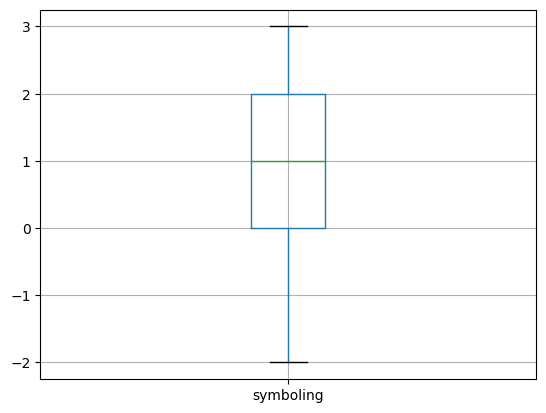

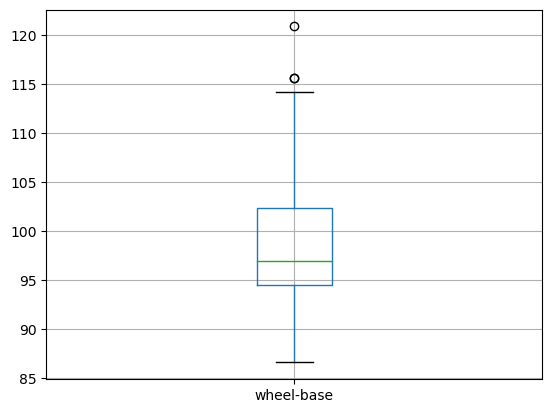

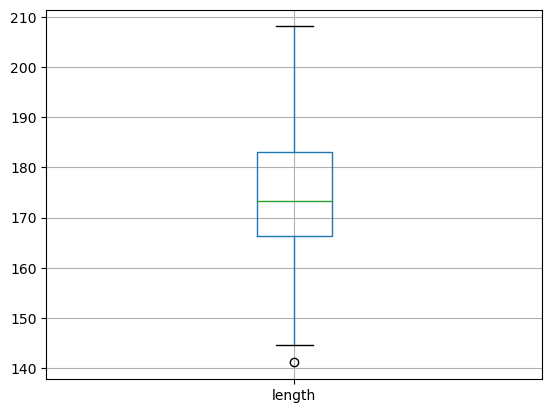

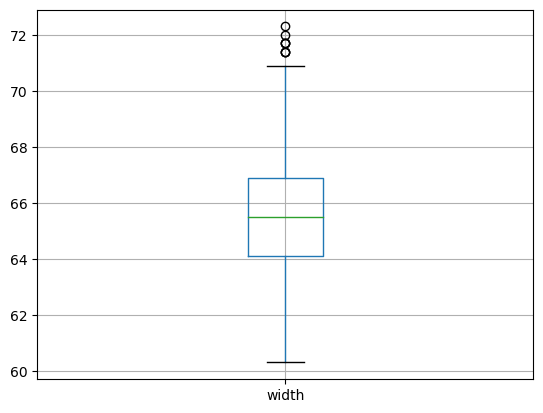

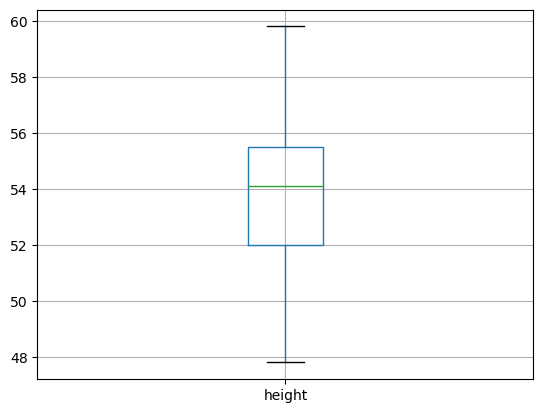

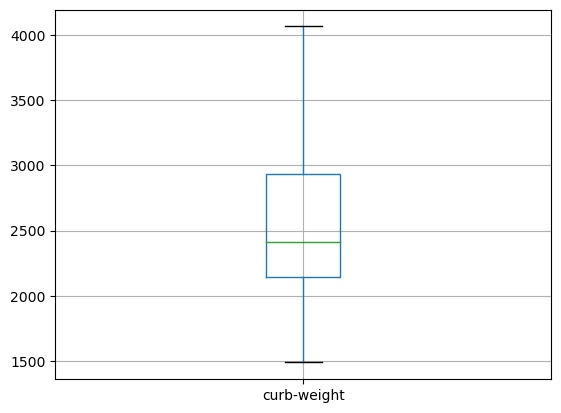

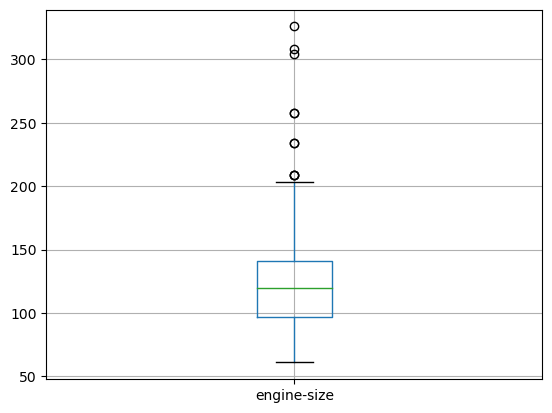

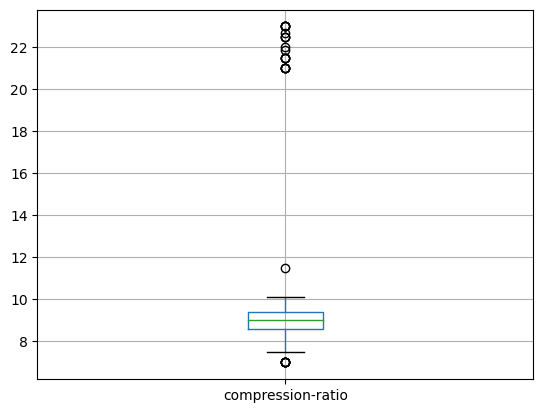

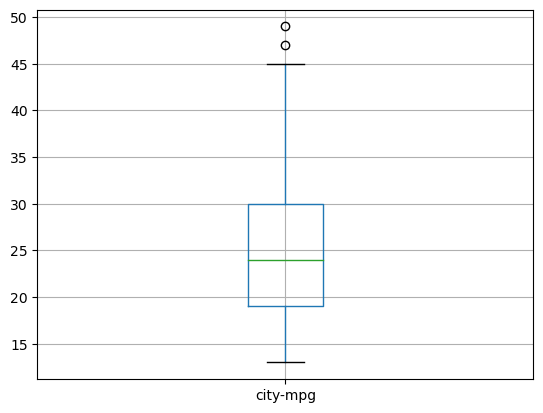

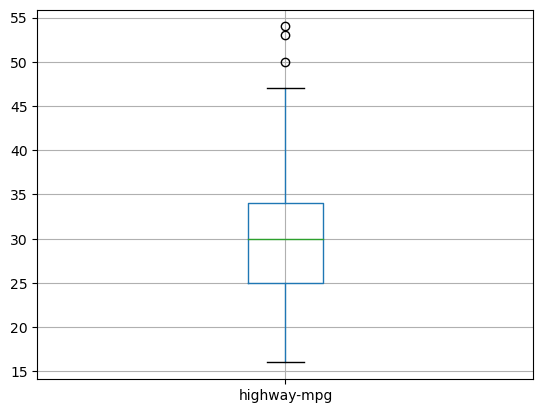

In [54]:
for i in df.describe().columns:  # describe를 해야 수치형 칼럼만 나옴
    df[[i]].boxplot()
    plt.show()

#### Z-score

In [ ]:
def find_outlier_z(data,threshold = 3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_score = [(y-mean) / std for y in data]  # 표준화
    
    masks = np.where(np.abs(z_score) > threshold)
    
    return masks

find_outlier_z(df['compression-ratio'])